In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', 999)

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, 'src/')
from modeling import *


In [2]:
df = pd.read_csv('cleaned_players_df.csv')
df.head()

,fullName,name,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,height,weight,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWinningGoals17,overTimeGoals17,shortHandedGoals17,shortHandedPoints17,shortHandedTimeOnIce17,blocked17,plusMinus17,points17,shifts17,timeOnIcePerGame17,evenTimeOnIcePerGame17,shortHandedTimeOnIcePerGame17,powerPlayTimeOnIcePerGame17,timeOnIce16,assists16,goals16,pim16,shots16,games16,hits16,powerPlayGoals16,powerPlayPoints16,powerPlayTimeOnIce16,evenTimeOnIce16,penaltyMinutes16,faceOffPct16,shotPct16,gameWinningGoals16,overTimeGoals16,shortHandedGoals16,shortHandedPoints16,shortHandedTimeOnIce16,blocked16,plusMinus16,points16,shifts16,timeOnIcePerGame16,evenTimeOnIcePerGame16,shortHandedTimeOnIcePerGame16,powerPlayTimeOnIcePerGame16,timeOnIce15,assists15,goals15,pim15,shots15,games15,hits15,powerPlayGoals15,powerPlayPoints15,powerPlayTimeOnIce15,evenTimeOnIce15,penaltyMinutes15,faceOffPct15,shotPct15,gameWinningGoals15,overTimeGoals15,shortHandedGoals15,shortHandedPoints15,shortHandedTimeOnIce15,blocked15,plusMinus15,points15,shifts15,timeOnIcePerGame15,evenTimeOnIcePerGame15,shortHandedTimeOnIcePerGame15,powerPlayTimeOnIcePerGame15,timeOnIce14,assists14,goals14,pim14,shots14,games14,hits14,powerPlayGoals14,powerPlayPoints14,powerPlayTimeOnIce14,evenTimeOnIce14,penaltyMinutes14,faceOffPct14,shotPct14,gameWinningGoals14,overTimeGoals14,shortHandedGoals14,shortHandedPoints14,shortHandedTimeOnIce14,blocked14,plusMinus14,points14,shifts14,timeOnIcePerGame14,evenTimeOnIcePerGame14,shortHandedTimeOnIcePerGame14,powerPlayTimeOnIcePerGame14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
0,P.K. Subban,Defenseman,1989,32,Toronto,ON,CAN,"6' 0""",210,True,False,False,R,Y,1504:25,11.0,7.0,79.0,151.0,68.0,88.0,2.0,6.0,160:14,1232:41,79.0,0.0,4.6,3.0,0.0,0.0,0.0,111:30,90.0,-21.0,18.0,1883.0,22:07,18:07,01:38,02:21,1427:51,22.0,9.0,60.0,168.0,63.0,56.0,2.0,10.0,163:07,1166:17,60.0,0.0,5.36,1.0,0.0,1.0,1.0,98:27,75.0,5.0,31.0,1731.0,22:39,18:30,01:33,02:35,1977:24,43.0,16.0,82.0,207.0,82.0,111.0,5.0,25.0,253:23,1507:00,82.0,33.33,7.73,2.0,0.0,0.0,1.0,217:01,90.0,18.0,59.0,2323.0,24:06,18:22,02:38,03:05,1610:40,30.0,10.0,44.0,142.0,66.0,78.0,3.0,16.0,172:00,1300:43,44.0,0.0,7.04,2.0,0.0,0.0,1.0,137:57,104.0,-8.0,40.0,1860.0,24:24,19:42,02:05,02:36,1792:38,45.0,6.0,75.0,176.0,68.0,102.0,2.0,24.0,313:51,1319:21,75.0,0.0,3.41,0.0,0.0,0.0,0.0,159:26,80.0,4.0,51.0,1922.0,26:21,19:24,02:20,04:36,2148:40,45.0,15.0,74.0,170.0,82.0,97.0,8.0,21.0,302:12,1669:11,74.0,0.0,8.82,5.0,1.0,0.0,0.0,177:17,142.0,21.0,60.0,2472.0,26:1

In [3]:
df = df.rename(columns={ '2014-15': 'sal_14_15', '2015-16': 'sal_15_16',\
                         '2016-17': 'sal_16_17', '2017-18': 'sal_17_18',\
                         '2018-19': 'sal_18_19', '2019-20': 'sal_19_20',\
                        '2020-21':'sal_20_21'})
df.head()

,fullName,name,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,height,weight,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWinningGoals17,overTimeGoals17,shortHandedGoals17,shortHandedPoints17,shortHandedTimeOnIce17,blocked17,plusMinus17,points17,shifts17,timeOnIcePerGame17,evenTimeOnIcePerGame17,shortHandedTimeOnIcePerGame17,powerPlayTimeOnIcePerGame17,timeOnIce16,assists16,goals16,pim16,shots16,games16,hits16,powerPlayGoals16,powerPlayPoints16,powerPlayTimeOnIce16,evenTimeOnIce16,penaltyMinutes16,faceOffPct16,shotPct16,gameWinningGoals16,overTimeGoals16,shortHandedGoals16,shortHandedPoints16,shortHandedTimeOnIce16,blocked16,plusMinus16,points16,shifts16,timeOnIcePerGame16,evenTimeOnIcePerGame16,shortHandedTimeOnIcePerGame16,powerPlayTimeOnIcePerGame16,timeOnIce15,assists15,goals15,pim15,shots15,games15,hits15,powerPlayGoals15,powerPlayPoints15,powerPlayTimeOnIce15,evenTimeOnIce15,penaltyMinutes15,faceOffPct15,shotPct15,gameWinningGoals15,overTimeGoals15,shortHandedGoals15,shortHandedPoints15,shortHandedTimeOnIce15,blocked15,plusMinus15,points15,shifts15,timeOnIcePerGame15,evenTimeOnIcePerGame15,shortHandedTimeOnIcePerGame15,powerPlayTimeOnIcePerGame15,timeOnIce14,assists14,goals14,pim14,shots14,games14,hits14,powerPlayGoals14,powerPlayPoints14,powerPlayTimeOnIce14,evenTimeOnIce14,penaltyMinutes14,faceOffPct14,shotPct14,gameWinningGoals14,overTimeGoals14,shortHandedGoals14,shortHandedPoints14,shortHandedTimeOnIce14,blocked14,plusMinus14,points14,shifts14,timeOnIcePerGame14,evenTimeOnIcePerGame14,shortHandedTimeOnIcePerGame14,powerPlayTimeOnIcePerGame14,sal_14_15,sal_15_16,sal_16_17,sal_17_18,sal_18_19,sal_19_20,sal_20_21
0,P.K. Subban,Defenseman,1989,32,Toronto,ON,CAN,"6' 0""",210,True,False,False,R,Y,1504:25,11.0,7.0,79.0,151.0,68.0,88.0,2.0,6.0,160:14,1232:41,79.0,0.0,4.6,3.0,0.0,0.0,0.0,111:30,90.0,-21.0,18.0,1883.0,22:07,18:07,01:38,02:21,1427:51,22.0,9.0,60.0,168.0,63.0,56.0,2.0,10.0,163:07,1166:17,60.0,0.0,5.36,1.0,0.0,1.0,1.0,98:27,75.0,5.0,31.0,1731.0,22:39,18:30,01:33,02:35,1977:24,43.0,16.0,82.0,207.0,82.0,111.0,5.0,25.0,253:23,1507:00,82.0,33.33,7.73,2.0,0.0,0.0,1.0,217:01,90.0,18.0,59.0,2323.0,24:06,18:22,02:38,03:05,1610:40,30.0,10.0,44.0,142.0,66.0,78.0,3.0,16.0,172:00,1300:43,44.0,0.0,7.04,2.0,0.0,0.0,1.0,137:57,104.0,-8.0,40.0,1860.0,24:24,19:42,02:05,02:36,1792:38,45.0,6.0,75.0,176.0,68.0,102.0,2.0,24.0,313:51,1319:21,75.0,0.0,3.41,0.0,0.0,0.0,0.0,159:26,80.0,4.0,51.0,1922.0,26:21,19:24,02:20,04:36,2148:40,45.0,15.0,74.0,170.0,82.0,97.0,8.0,21.0,302:12,1669:11,74.0,0.0,8.82,5.0,1.0,0.0,0.0,177:17,142.0,21.0,60

In [4]:
df = df.fillna(0)

### First Simple Model

In [5]:
formula = 'sal_20_21 ~ goals18'
sq_mod = sm.formula.ols(formula, df).fit()
sq_mod_summ = sq_mod.summary()
sq_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sal_20_21   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     122.5
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           7.93e-24
Time:                        22:06:58   Log-Likelihood:                -4511.2
No. Observations:                 280   AIC:                             9026.
Df Residuals:                     278   BIC:                             9034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.604e+06   2.29e+05      7.004      0.000    1.15e+06    2.05e+06
goals18     1.468e+05   1.33e+04     11.066      0.000    1.21e+05    1.73e+05
==============================================================================
Omnibus:                       46.183   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.796
Skew:                           0.765   Prob(JB):                     4.35e-26
Kurtosis:                       5.770   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
time_col = ['timeOnIce', 'powerPlayTimeOnIce', 'evenTimeOnIce',\
            'timeOnIcePerGame', 'evenTimeOnIcePerGame','shortHandedTimeOnIce',\
           'powerPlayTimeOnIcePerGame', 'shortHandedTimeOnIcePerGame']

years = ['14','15','16','17','18','19','20']

time_cols = []

for col in time_col:
    for year in years:
        time_cols.append(f'{col}{year}')

In [7]:
for col in time_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].apply(lambda x: x.replace(':', '.'))
    df[col] = df[col].astype(float)

In [8]:
df['height'] = df['height'].map(lambda x: x.rstrip('"'))

df['height'] = [val.split("'") for val in df['height']]

df['height'] = [(float(val[0]) * 12) + float(val[1]) for val in df['height']]

In [9]:
df_cat_cols = ['name', 'birthCity', 'birthStateProvince', 'birthCountry',\
               'alternateCaptain', 'captain', 'rookie', 'shootsCatches',\
               'rosterStatus', 'fullName']
df_no_cats = df.drop(df_cat_cols, axis=1)

In [10]:
multi_form = 'sal_20_21 ~' + '+'.join(df_no_cats.columns[:-1])
multiple_model = ols(multi_form, df_no_cats).fit()
multiple_model_summary = multiple_model.summary()
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sal_20_21   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     6.503
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           7.83e-20
Time:                        22:06:59   Log-Likelihood:                -4194.9
No. Observations:                 280   AIC:                             8762.
Df Residuals:                      94   BIC:                             9438.
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      3.029e+08   6.22e+08      0.487      0.627   -9.32e+08    1.54e+09
birthDate                     -1.418e+05   3.08e+05     -0.460      0.646   -7.53e+05     4.7e+05
currentAge                    -2.264e+05   3.17e+05     -0.714      0.477   -8.56e+05    4.03e+05
height                        -1.592e+05   1.13e+05     -1.404      0.164   -3.84e+05    6.59e+04
weight                         3896.6968   1.52e+04      0.256      0.799   -2.64e+04    3.42e+04
timeOnIce20                   -2.419e+05   6.52e+05     -0.371      0.711   -1.54e+06    1.05e+06
assists20                      2.194e+04    3.5e+04      0.626      0.533   -4.76e+04    9.15e+04
goals20                       -1.739e+04   5.21e+04     -0.334      0.739   -1.21e+05     8.6e+04
pim20                         -7099.3260   6606.755     -1.075      0.285   -2.02e+04    6018.541
shots20                        1.092e+04   1.06e+04      1.028      0.307   -1.02e+04     3.2e+04
games20                       -9.917e+04   4.09e+04     -2.427      0.017    -1.8e+05    -1.8e+04
hits20                         6644.7838   6426.877      1.034      0.304   -6115.930    1.94e+04
powerPlayGoals20               7.692e+04   1.18e+05      0.652      0.516   -1.57e+05    3.11e+05
powerPlayPoints20             -1078.6407   6.44e+04     -0.017      0.987   -1.29e+05    1.27e+05
powerPlayTimeOnIce20           2.306e+05    6.5e+05      0.355      0.723   -1.06e+06    1.52e+06
evenTimeOnIce20                2.497e+05   6.53e+05      0.382      0.703   -1.05e+06    1.55e+06
penaltyMinutes20              -7099.3315   6606.754     -1.075      0.285   -2.02e+04    6018.534
faceOffPct20                  -2431.9326   1.03e+04     -0.236      0.814   -2.29e+04     1.8e+04
shotPct20                      1.046e+05    7.7e+04      1.358      0.178   -4.83e+04    2.57e+05
gameWinningGoals20            -3.049e+05    1.3e+05     -2.353      0.021   -5.62e+05   -4.76e+04
overTimeGoals20               -6.145e+05   2.65e+05     -2.321      0.022   -1.14e+06   -8.88e+04
shortHandedGoals20             1.103e+05   3.43e+05      0.321      0.749   -5.71e+05    7.92e+05
shortHandedPoints20           -1.051e+05   2.54e+05     -0.414      0.680   -6.09e+05    3.99e+05
shortHandedTimeOnIce20         2.577e+05   6.48e+05      0.398      0.692   -1.03e+06    1.54e+06
blocked20                     -2753.1965   1.28e+04     -0.216      0.830   -2.81e+04    2.26e+04
plusMinus20                   -2.418e+04   1.68e+04     -1.436      0.154   -5.76e+04    9255.155
points20                       4547.8595   2.89e+04      0.157      0.875   -5.29e+04     6.2e+04
shifts20                      -1980.0021   2600.157     -0.761      0.448   -7142.674    3182.670
timeOnIcePerGame20              8.37e+05   6.

In [11]:
df_corr=df_no_cats.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr = df_corr[df_corr['cc'] < 1.0000]
df_corr.head(25)

,cc
pairs,
"(timeOnIce15, evenTimeOnIce15)",0.996892
"(timeOnIce14, evenTimeOnIce14)",0.996396
"(timeOnIce16, evenTimeOnIce16)",0.995872
"(timeOnIce14, shifts14)",0.994979
"(timeOnIcePerGame14, evenTimeOnIcePerGame14)",0.994954
"(shifts15, timeOnIce15)",0.994746
"(timeOnIcePerGame15, evenTimeOnIcePerGame15)",0.994545
"(evenTimeOnIce17, timeOnIce17)",0.994262
"(evenTimeOnIce14, shifts14)",0.993955


In [12]:
less_than_05 = df_no_cats[['sal_20_21', 'games20', 'gameWinningGoals20', 'overTimeGoals20', 'timeOnIcePerGame18', 'evenTimeOnIcePerGame18', 'powerPlayTimeOnIce18', 'assists17', 'goals17',\
           'pim17', 'powerPlayGoals17', 'penaltyMinutes17', 'shortHandedGoals17', 'powerPlayGoals16', 'blocked17', 'goals15']]

multi_form = 'sal_20_21 ~' + '+'.join(less_than_05.columns[1:])
multiple_model = ols(multi_form, less_than_05).fit()
multiple_model_summary = multiple_model.summary()
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sal_20_21   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     17.23
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           6.20e-30
Time:                        22:06:59   Log-Likelihood:                -4471.7
No. Observations:                 280   AIC:                             8973.
Df Residuals:                     265   BIC:                             9028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.036e+06   6.94e+05      1.494      0.136   -3.29e+05     2.4e+06
games20                -1.618e+04   1.05e+04     -1.543      0.124   -3.68e+04    4459.556
gameWinningGoals20      1.958e+05   9.59e+04      2.041      0.042    6934.401    3.85e+05
overTimeGoals20        -3.238e+05   2.37e+05     -1.366      0.173   -7.91e+05    1.43e+05
timeOnIcePerGame18      -2.23e+05   1.86e+05     -1.197      0.232    -5.9e+05    1.44e+05
evenTimeOnIcePerGame18  3.378e+05   2.09e+05      1.613      0.108   -7.46e+04     7.5e+05
powerPlayTimeOnIce18     1.23e+04   2732.210      4.502      0.000    6921.734    1.77e+04
assists17               4.632e+04    1.7e+04      2.733      0.007    1.29e+04    7.97e+04
goals17                 6.023e+04   2.88e+04      2.093      0.037    3562.795    1.17e+05
pim17                  -7231.8088   3453.624     -2.094      0.037    -1.4e+04    -431.774
powerPlayGoals17        -3.29e+04   7.92e+04     -0.415      0.678   -1.89e+05    1.23e+05
penaltyMinutes17       -7231.8088   3453.624     -2.094      0.037    -1.4e+04    -431.774
shortHandedGoals17     -1.692e+05   1.88e+05     -0.900      0.369   -5.39e+05    2.01e+05
powerPlayGoals16       -8.541e+04    6.7e+04     -1.274      0.204   -2.17e+05    4.66e+04
blocked17               3537.1325   4545.199      0.778      0.437   -5412.166    1.25e+04
goals15                -1.154e+04   2.05e+04     -0.564      0.573   -5.18e+04    2.88e+04
==============================================================================
Omnibus:                       40.182   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.053
Skew:                           0.475   Prob(JB):                     1.18e-37
Kurtosis:                       6.698   Cond. No.                     2.18e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.73e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
df_corr=less_than_05.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr = df_corr[df_corr['cc'] < 1.0000]
df_corr

,cc
pairs,
"(evenTimeOnIcePerGame18, timeOnIcePerGame18)",0.985053
"(goals17, powerPlayGoals17)",0.829230
"(assists17, goals17)",0.728450
"(powerPlayTimeOnIce18, assists17)",0.724516
"(goals15, powerPlayGoals16)",0.718820
...,...
"(sal_20_21, shortHandedGoals17)",0.035459
"(overTimeGoals20, shortHandedGoals17)",0.031169
"(blocked17, powerPlayGoals17)",0.012080


In [14]:
less_than_05 = less_than_05.drop(['timeOnIcePerGame18', 'powerPlayGoals17', 'goals17', 'goals15'], axis=1)

In [15]:
multi_form = 'sal_20_21 ~' + '+'.join(less_than_05.columns[1:])
multiple_model = ols(multi_form, less_than_05).fit()
multiple_model_summary = multiple_model.summary()
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sal_20_21   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     23.07
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           4.59e-31
Time:                        22:06:59   Log-Likelihood:                -4475.6
No. Observations:                 280   AIC:                             8973.
Df Residuals:                     269   BIC:                             9013.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.224e+06   6.93e+05      1.768      0.078   -1.39e+05    2.59e+06
games20                -1.929e+04   1.05e+04     -1.842      0.067   -3.99e+04    1325.366
gameWinningGoals20       2.31e+05   9.37e+04      2.464      0.014    4.64e+04    4.16e+05
overTimeGoals20          -3.5e+05   2.38e+05     -1.471      0.142   -8.18e+05    1.18e+05
evenTimeOnIcePerGame18  9.773e+04   4.12e+04      2.370      0.019    1.65e+04    1.79e+05
powerPlayTimeOnIce18    1.126e+04   2285.320      4.926      0.000    6757.493    1.58e+04
assists17               6.002e+04   1.54e+04      3.893      0.000    2.97e+04    9.04e+04
pim17                  -4732.1496   3282.770     -1.442      0.151   -1.12e+04    1731.039
penaltyMinutes17       -4732.1496   3282.770     -1.442      0.151   -1.12e+04    1731.039
shortHandedGoals17     -1.108e+05   1.72e+05     -0.645      0.520   -4.49e+05    2.28e+05
powerPlayGoals16       -7.674e+04   5.56e+04     -1.380      0.169   -1.86e+05    3.27e+04
blocked17              -1251.0865   4035.415     -0.310      0.757   -9196.101    6693.928
==============================================================================
Omnibus:                       54.369   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.027
Skew:                           0.675   Prob(JB):                     5.66e-57
Kurtosis:                       7.514   Cond. No.                     1.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.9e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
# high_colin_list = []

# high_colin_cols = ['evenTimeOnIce', 'shifts', 'evenTimeOnIcePerGame']

# for year in years:
#     for col in high_colin_cols:
#         high_colin_list.append(f'{col}{year}')

# for col in high_colin_list:
#     df_no_cats = df_no_cats.drop(col, axis=1)

In [17]:
df_corr=df_no_cats.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr = df_corr[df_corr['cc'] < 1.0000]
df_corr.head(25)

,cc
pairs,
"(timeOnIce15, evenTimeOnIce15)",0.996892
"(timeOnIce14, evenTimeOnIce14)",0.996396
"(timeOnIce16, evenTimeOnIce16)",0.995872
"(timeOnIce14, shifts14)",0.994979
"(timeOnIcePerGame14, evenTimeOnIcePerGame14)",0.994954
"(shifts15, timeOnIce15)",0.994746
"(timeOnIcePerGame15, evenTimeOnIcePerGame15)",0.994545
"(evenTimeOnIce17, timeOnIce17)",0.994262
"(evenTimeOnIce14, shifts14)",0.993955


In [18]:
# high_colin_list = []

# high_colin_cols = ['assists', 'shortHandedTimeOnIce', 'shortHandedTimeOnIcePerGame',\
#                   'powerPlayTimeOnIcePerGame']

# for year in years:
#     for col in high_colin_cols:
#         high_colin_list.append(f'{col}{year}')

# for col in high_colin_list:
#     df_no_cats = df_no_cats.drop(col, axis=1)

In [19]:
df_no_cats.drop('birthDate', axis=1, inplace=True)

In [20]:
# high_colin_list = []

# high_colin_cols = ['timeOnIce', 'shots', 'points']

# for year in years:
#     for col in high_colin_cols:
#         high_colin_list.append(f'{col}{year}')

# for col in high_colin_list:
#     df_no_cats = df_no_cats.drop(col, axis=1)

In [21]:
df_corr=df_no_cats.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr = df_corr[df_corr['cc'] < 1.0000]
df_corr.head(25)

,cc
pairs,
"(evenTimeOnIce15, timeOnIce15)",0.996892
"(timeOnIce14, evenTimeOnIce14)",0.996396
"(timeOnIce16, evenTimeOnIce16)",0.995872
"(timeOnIce14, shifts14)",0.994979
"(timeOnIcePerGame14, evenTimeOnIcePerGame14)",0.994954
"(shifts15, timeOnIce15)",0.994746
"(evenTimeOnIcePerGame15, timeOnIcePerGame15)",0.994545
"(timeOnIce17, evenTimeOnIce17)",0.994262
"(shifts14, evenTimeOnIce14)",0.993955


# Summing redundant columns

In [22]:
redundant = ['timeOnIce',
 'assists',
 'goals',
 'pim',
 'shots',
 'games',
 'hits',
 'powerPlayGoals',
 'powerPlayPoints',
 'powerPlayTimeOnIce',
 'evenTimeOnIce',
 'penaltyMinutes',
 'faceOffPct',
 'shotPct',
 'gameWinningGoals',
 'overTimeGoals',
 'shortHandedGoals',
 'shortHandedPoints',
 'shortHandedTimeOnIce',
 'blocked',
 'plusMinus',
 'points',
 'shifts',
 'timeOnIcePerGame',
 'evenTimeOnIcePerGame',
 'shortHandedTimeOnIcePerGame',
 'powerPlayTimeOnIcePerGame']

redundant_cols = []

for year in years:
    for col in redundant:
        redundant_cols.append(f'{col}{year}')

In [23]:
redundant_dict = {}

for num in range(0, 27):
    redundant_dict[num] = {}
    for i in range(num, len(redundant_cols), 27):
        redundant_dict[num][i] = redundant_cols[i]

In [24]:
for num in range(0,27):
    val = redundant_dict[num].values()
    cum_stats = np.sum(df_no_cats[val],axis=1)
    df_no_cats[num] = pd.DataFrame(cum_stats)

In [25]:
df_no_cats.rename(columns={0:'total_timeOnIce',
 1:'total_assists',
 2:'total_goals',
 3:'total_pim',
 4:'total_shots',
 5:'total_games',
 6:'total_hits',
 7:'total_powerPlayGoals',
 8:'total_powerPlayPoints',
 9:'total_powerPlayTimeOnIce',
 10:'total_evenTimeOnIce',
 11:'total_penaltyMinutes',
 12:'total_faceOffPct',
 13:'total_shotPct',
 14:'total_gameWinningGoals',
 15:'total_overTimeGoals',
 16:'total_shortHandedGoals',
 17:'total_shortHandedPoints',
 18:'total_shortHandedTimeOnIce',
 19:'total_blocked',
 20:'total_plusMinus',
 21:'total_points',
 22:'total_shifts',
 23:'total_timeOnIcePerGame',
 24:'total_evenTimeOnIcePerGame',
 25:'total_shortHandedTimeOnIcePerGame',
 26:'total_powerPlayTimeOnIcePerGame'}, inplace=True)

In [26]:
cum_df = df_no_cats.drop(redundant_cols, axis=1)
cum_df = cum_df[cum_df['sal_20_21'] != 0]
cum_df.to_csv('cumulative_df.csv')

In [27]:
cum_df = cum_df[['sal_20_21',
                 'sal_19_20',
                 'currentAge',
                 'height',
                 'weight',
                 'sal_14_15',
                 'sal_15_16',
                 'sal_16_17',
                 'sal_17_18',
                 'sal_18_19',
                 'total_timeOnIce',
                 'total_assists',
                 'total_goals',
                 'total_pim',
                 'total_shots',
                 'total_games',
                 'total_hits',
                 'total_powerPlayGoals',
                 'total_powerPlayPoints',
                 'total_powerPlayTimeOnIce',
                 'total_evenTimeOnIce',
                 'total_penaltyMinutes',
                 'total_faceOffPct',
                 'total_shotPct',
                 'total_gameWinningGoals',
                 'total_overTimeGoals',
                 'total_shortHandedGoals',
                 'total_shortHandedPoints',
                 'total_shortHandedTimeOnIce',
                 'total_blocked',
                 'total_plusMinus',
                 'total_points',
                 'total_shifts',
                 'total_timeOnIcePerGame',
                 'total_evenTimeOnIcePerGame',
                 'total_shortHandedTimeOnIcePerGame',
                 'total_powerPlayTimeOnIcePerGame']]

In [28]:
multi_form = 'sal_20_21 ~' + '+'.join(cum_df.columns[1:])
multiple_model = ols(multi_form, cum_df).fit()
multiple_model_summary = multiple_model.summary()
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sal_20_21   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     39.54
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           5.55e-75
Time:                        22:07:00   Log-Likelihood:                -3847.2
No. Observations:                 252   AIC:                             7764.
Df Residuals:                     217   BIC:                             7888.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2.166e+06   3.31e+06      0.655      0.513   -4.35e+06    8.68e+06
sal_19_20                             0.7147      0.038     18.571      0.000       0.639       0.791
currentAge                        -4.329e+04   3.16e+04     -1.370      0.172   -1.06e+05     1.9e+04
height                            -1.816e+04   5.58e+04     -0.325      0.745   -1.28e+05    9.19e+04
weight                             5287.5842   8694.656      0.608      0.544   -1.18e+04    2.24e+04
sal_14_15                             0.0742      0.073      1.018      0.310      -0.069       0.218
sal_15_16                            -0.0694      0.071     -0.974      0.331      -0.210       0.071
sal_16_17                             0.0785      0.060      1.307      0.192      -0.040       0.197
sal_17_18                            -0.0217      0.052     -0.416      0.678      -0.124       0.081
sal_18_19                            -0.0009      0.036     -0.025      0.980      -0.072       0.071
total_timeOnIce                   -2.661e+04    1.4e+05     -0.190      0.850   -3.03e+05     2.5e+05
total_assists                     -2879.2786   5209.490     -0.553      0.581   -1.31e+04    7388.399
total_goals                        8394.0440   7029.848      1.194      0.234   -5461.479    2.22e+04
total_pim                          -703.2199    447.003     -1.573      0.117   -1584.244     177.804
total_shots                         144.3668    750.664      0.192      0.848   -1335.159    1623.892
total_games                       -4893.5601   3754.380     -1.303      0.194   -1.23e+04    2506.159
total_hits                          322.4776    424.745      0.759      0.449    -514.677    1159.632
total_powerPlayGoals              -1.648e+04      2e+04     -0.823      0.411   -5.59e+04     2.3e+04
total_powerPlayPoints              7221.0167   9944.104      0.726      0.469   -1.24e+04    2.68e+04
total_powerPlayTimeOnIce            2.37e+04    1.4e+05      0.169      0.866   -2.53e+05    3.01e+05
total_evenTimeOnIce                2.682e+04    1.4e+05      0.191      0.849    -2.5e+05    3.03e+05
total_penaltyMinutes               -703.2199    447.003     -1.573      0.117   -1584.244     177.804
total_faceOffPct                  -1600.6767   1370.794     -1.168      0.244   -4302.453    1101.099
total_shotPct                      4539.7860   7076.058      0.642      0.522   -9406.814    1.85e+04
total_gameWinningGoals            -1.048e+04    2.6e+04     -0.403      0.688   -6.18e+04    4.08e+04
total_overTimeGoals               -6.135e+04   5.31e+04     -1.155      0.250   -1.66e+05    4.34e+04
total_shortHandedGoals            -1.138e+05   7.27e+04     -1.565      0.119   -2.57e+05    2.95e+04
total_shortHandedPoints

In [29]:
df_corr=cum_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr = df_corr[df_corr['cc'] < 1.0000]
df_corr.head(25)

,cc
pairs,
"(total_evenTimeOnIce, total_timeOnIce)",0.995367
"(total_evenTimeOnIcePerGame, total_timeOnIcePerGame)",0.992086
"(total_powerPlayTimeOnIce, total_powerPlayTimeOnIcePerGame)",0.989215
"(total_timeOnIce, total_shifts)",0.989014
"(total_evenTimeOnIce, total_shifts)",0.986518
"(total_shortHandedTimeOnIcePerGame, total_shortHandedTimeOnIce)",0.984258
"(total_shifts, total_games)",0.961776
"(total_points, total_assists)",0.961371
"(total_powerPlayTimeOnIce, total_powerPlayPoints)",0.959901


In [30]:
cum_df.drop('total_evenTimeOnIce', axis=1, inplace=True)

In [31]:
cum_df.drop(['total_evenTimeOnIcePerGame', 'total_shifts', 'total_powerPlayTimeOnIcePerGame',\
            'total_shortHandedTimeOnIcePerGame'], axis=1, inplace = True)

In [32]:
cum_df.drop(['total_points', 'total_powerPlayTimeOnIce', 'total_gameWinningGoals', 'total_timeOnIcePerGame'], axis=1, inplace=True)

In [33]:
cum_df.drop(['total_games', 'total_powerPlayPoints', 'total_powerPlayGoals',\
             'total_shortHandedPoints', 'total_shots'], axis=1, inplace=True)

In [34]:
df_corr=cum_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr = df_corr[df_corr['cc'] < 1.0000]
df_corr.head()

,cc
pairs,
"(sal_20_21, sal_19_20)",0.915367
"(sal_16_17, sal_17_18)",0.840468
"(total_timeOnIce, total_assists)",0.825761
"(total_goals, total_shotPct)",0.818218
"(total_faceOffPct, total_shotPct)",0.782413


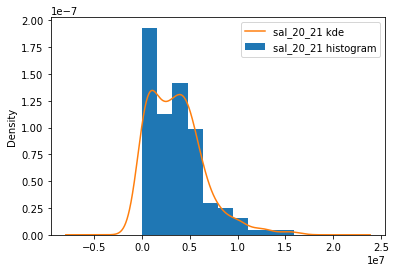

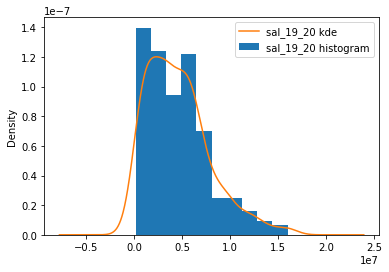

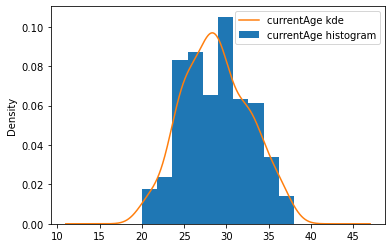

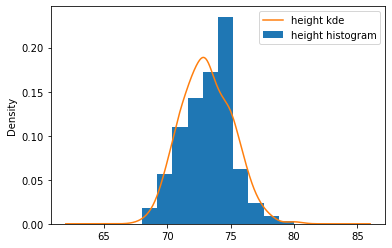

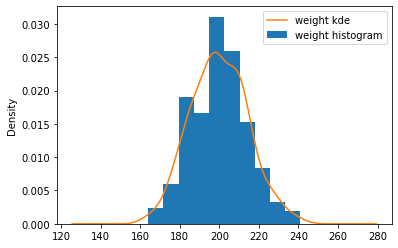

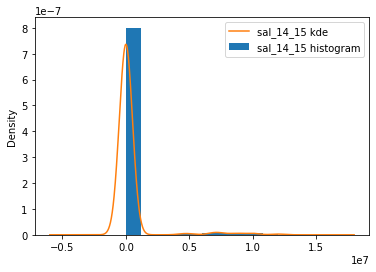

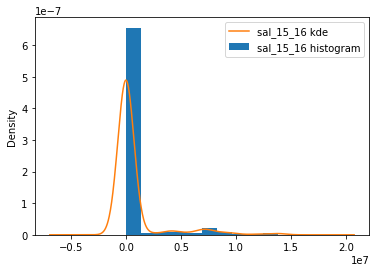

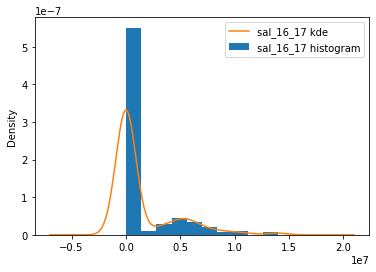

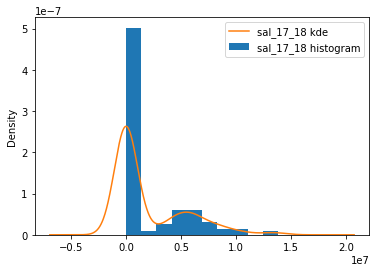

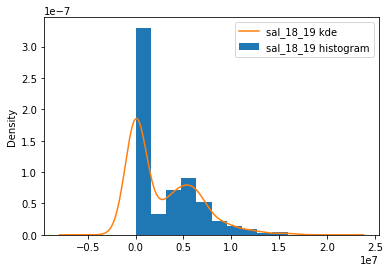

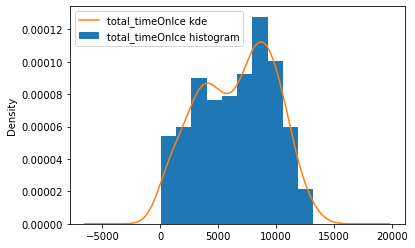

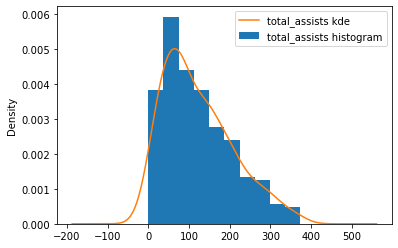

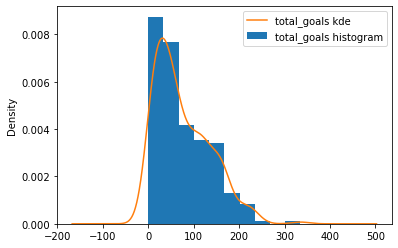

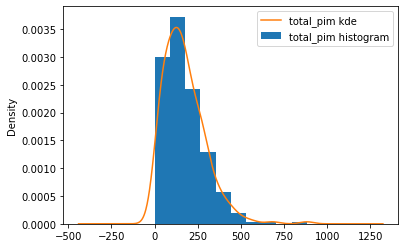

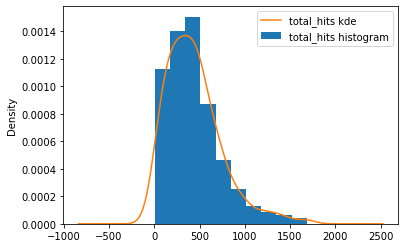

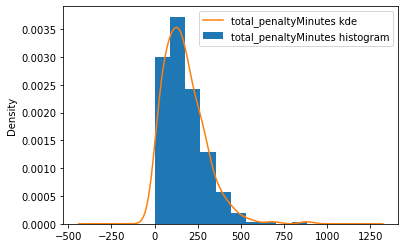

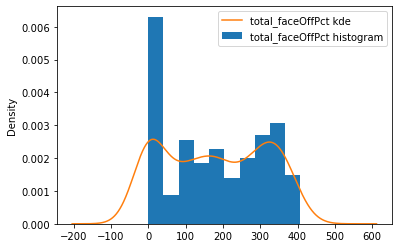

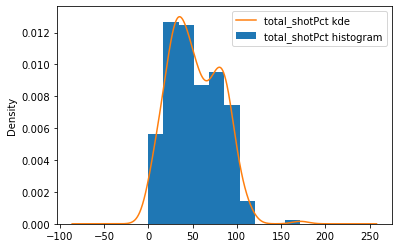

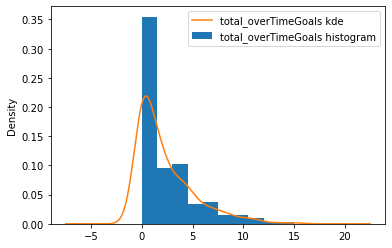

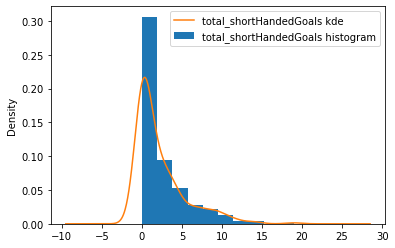

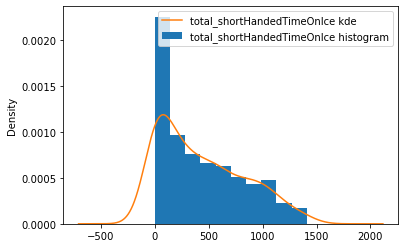

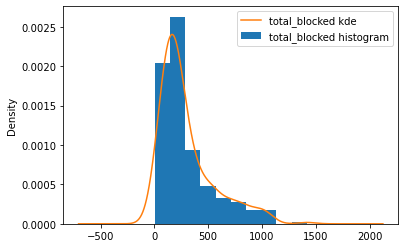

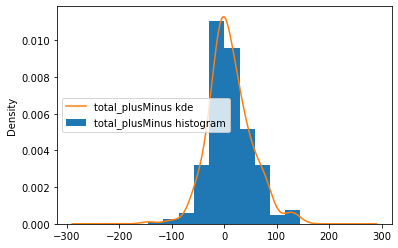

In [35]:
for column in cum_df:
    df_no_cats[column].plot.hist(density=True, label = column+' histogram')
    df_no_cats[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

# Above we can see that the data is not normally distributed. We will have to use a transformer below in our pipeline

In [36]:
pf = PolynomialFeatures(degree=2)

X = cum_df


pf.fit(X)
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())
pdf
corr_df = pdf.corr()
x = corr_df[corr_df['x0'] > .50]['x0'].sort_values(ascending=False)
x.head(25)

x0        1.000000
x0 x3     0.998784
x0 x4     0.989711
x0 x2     0.971929
x0^2      0.928187
x0 x1     0.924661
x1        0.915367
x1 x3     0.914580
x1 x4     0.904602
x1^2      0.884968
x0 x10    0.884855
x0 x11    0.867274
x1 x2     0.866952
x0 x17    0.847448
x0 x12    0.826206
x1 x11    0.803715
x1 x10    0.797208
x1 x17    0.768181
x1 x12    0.767060
x0 x18    0.740966
x0 x16    0.710407
x1 x18    0.695858
x3 x11    0.683126
x11       0.681089
x4 x11    0.678654
Name: x0, dtype: float64

In [37]:
cum_df['assist_height'] = cum_df['height'] * cum_df['total_assists']

In [38]:
multi_form = 'sal_20_21 ~' + '+'.join(cum_df.columns[1:])
multiple_model = ols(multi_form, cum_df).fit()
multiple_model_summary = multiple_model.summary()
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sal_20_21   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     61.09
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           5.35e-83
Time:                        22:07:04   Log-Likelihood:                -3853.1
No. Observations:                 252   AIC:                             7752.
Df Residuals:                     229   BIC:                             7833.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3.255e+06    4.7e+06      0.692      0.490   -6.01e+06    1.25e+07
sal_19_20                      0.7292      0.037     19.955      0.000       0.657       0.801
currentAge                 -5.548e+04   2.93e+04     -1.896      0.059   -1.13e+05    2186.726
height                     -1.936e+04   6.91e+04     -0.280      0.780   -1.56e+05    1.17e+05
weight                      1553.9534   8344.756      0.186      0.852   -1.49e+04     1.8e+04
sal_14_15                      0.0471      0.069      0.684      0.495      -0.089       0.183
sal_15_16                     -0.0569      0.068     -0.835      0.404      -0.191       0.077
sal_16_17                      0.0984      0.058      1.694      0.092      -0.016       0.213
sal_17_18                     -0.0481      0.049     -0.983      0.327      -0.144       0.048
sal_18_19                      0.0060      0.035      0.173      0.863      -0.062       0.074
total_timeOnIce             -102.1534     93.546     -1.092      0.276    -286.475      82.168
total_assists              -6001.3726   2.95e+04     -0.203      0.839   -6.42e+04    5.22e+04
total_goals                 6569.9176   3672.744      1.789      0.075    -666.774    1.38e+04
total_pim                   -497.4539    432.230     -1.151      0.251   -1349.111     354.203
total_hits                   229.6100    398.071      0.577      0.565    -554.739    1013.960
total_penaltyMinutes        -497.4539    432.230     -1.151      0.251   -1349.111     354.203
total_faceOffPct           -1760.4716   1143.172     -1.540      0.125   -4012.951     492.008
total_shotPct                 55.4602   5441.679      0.010      0.992   -1.07e+04    1.08e+04
total_overTimeGoals        -4.026e+04   4.69e+04     -0.859      0.391   -1.33e+05    5.21e+04
total_shortHandedGoals     -1909.8943   3.55e+04     -0.054      0.957   -7.19e+04    6.81e+04
total_shortHandedTimeOnIce   -23.2677    481.032     -0.048      0.961    -971.081     924.546
total_blocked                581.0807    790.928      0.735      0.463    -977.346    2139.507
total_plusMinus            -2023.7033   2163.462     -0.935      0.351   -6286.540    2239.134
assist_height                135.9111    397.170      0.342      0.733    -646.663     918.485
==============================================================================
Omnibus:                        5.488   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                7.530
Skew:                           0.094   Prob(JB):                       0.0232
Kurtosis:                       3.826   Cond. No.                     8.13e+20
==============================================================================

Notes:
[1] Standard Errors assume that the 

# Train Test Split

In [39]:
# X_1 = df_no_cats.drop('sal_20_21', axis=1)
# y_1 = df_no_cats['sal_20_21']

In [40]:
cum_df_full = pd.read_csv('cumulative_df.csv')

In [41]:
X = cum_df_full.drop(['sal_20_21', 'Unnamed: 0'], axis=1)
y = cum_df_full['sal_20_21']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Base Linear Regression

In [43]:
pipe = Pipeline([('scaler', StandardScaler()),
               ('model', LinearRegression())])
param_grid={}
gs = GridSearchCV(pipe,param_grid, n_jobs=-1, cv=5,\
                 return_train_score=True)

gs.fit(X_train, y_train)

lr_train_pred = gs.predict(X_train)
lr_test_pred = gs.predict(X_test)

print('RMSE Train:', np.sqrt(mean_squared_error(y_train, lr_train_pred)))
print('RMSE Test:', np.sqrt(mean_squared_error(y_test, lr_test_pred)))
print('R2 Train Score:', r2_score(y_train, lr_train_pred))
print('R2 Test Score:', r2_score(y_test, lr_test_pred))

RMSE Train: 834544.5846703218
RMSE Test: 1731704.4376582971
R2 Train Score: 0.8936167950203101
R2 Test Score: 0.7205059730937134


# Base Decision Tree

In [44]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

print('RMSE Train:', np.sqrt(mean_squared_error(y_train, dt_train_pred)))
print('RMSE Test:', np.sqrt(mean_squared_error(y_test, dt_test_pred)))
print('R2 Train Score:', r2_score(y_train, dt_train_pred))
print('R2 Test Score:', r2_score(y_test, dt_test_pred))

RMSE Train: 0.0
RMSE Test: 1795505.539745327
R2 Train Score: 1.0
R2 Test Score: 0.6995318174610768


# Base Random Forest

In [45]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)
rf_test_pred =rf.predict(X_test)

print('RMSE Train:', np.sqrt(mean_squared_error(y_train, rf_train_pred)))
print('RMSE Test:', np.sqrt(mean_squared_error(y_test, rf_test_pred)))
print('R2 Train Score:', r2_score(y_train, rf_train_pred))
print('R2 Test Score:', r2_score(y_test, rf_test_pred))

RMSE Train: 422516.3655827238
RMSE Test: 1262692.919363228
R2 Train Score: 0.972731512215906
R2 Test Score: 0.851399427871995


# Base KNN

In [46]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

print('RMSE Train:', np.sqrt(mean_squared_error(y_train, knn_train_pred)))
print('RMSE Test:', np.sqrt(mean_squared_error(y_test, knn_test_pred)))
print('R2 Train Score:', r2_score(y_train, knn_train_pred))
print('R2 Test Score:', r2_score(y_test, knn_test_pred))

RMSE Train: 1070264.4595482028
RMSE Test: 1732672.755423032
R2 Train Score: 0.8250329815262991
R2 Test Score: 0.7201933161620067


# Base SVR

In [47]:
svr = SVR()
svr.fit(X_train,y_train)
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

print('RMSE Train:', np.sqrt(mean_squared_error(y_train, svr_train_pred)))
print('RMSE Test:', np.sqrt(mean_squared_error(y_test, svr_test_pred)))
print('R2 Train Score:', r2_score(y_train, svr_train_pred))
print('R2 Test Score:', r2_score(y_test, svr_test_pred))

RMSE Train: 2559181.3880194454
RMSE Test: 3352781.9675973826
R2 Train Score: -0.0004056148697249018
R2 Test Score: -0.04769679490647816


# Move forward with RF

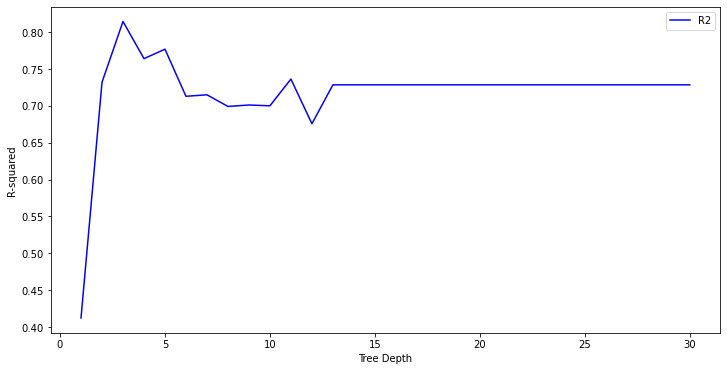

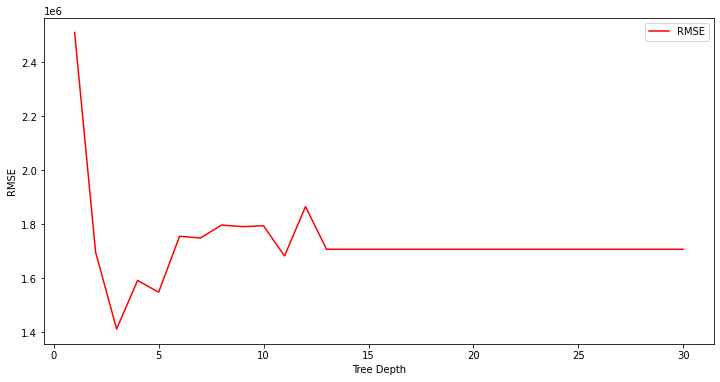

In [48]:
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, 
                                      random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

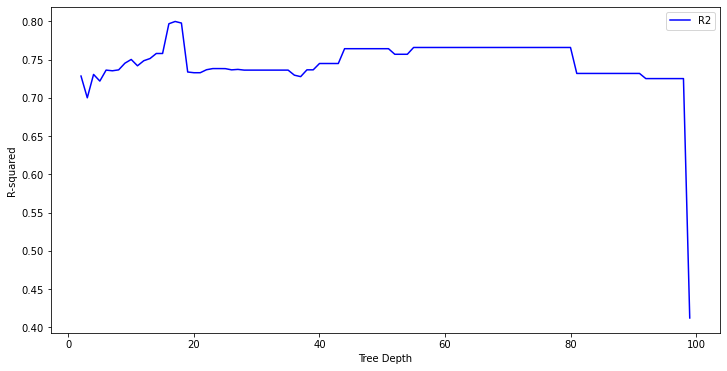

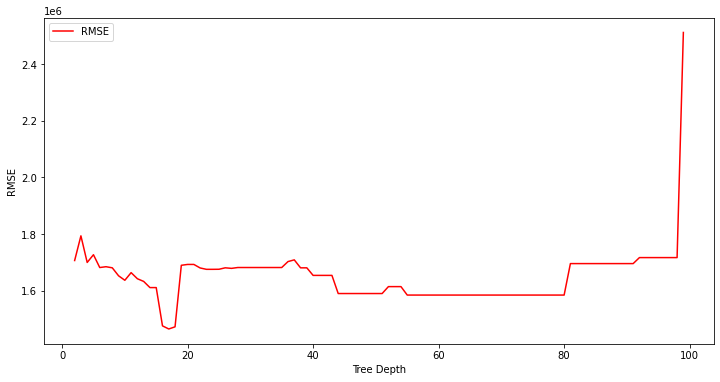

In [49]:

# Identify the optimal tree depth for given data
min_samples_split = list(range(2,100))
mse_results = []
r2_results = []

for min_samp in min_samples_split:
    regressor = DecisionTreeRegressor(min_samples_split=min_samp, 
                                      random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_split, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_split, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [50]:
dt = DecisionTreeRegressor(min_samples_split=80, max_depth=3, random_state=45)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
score = performance(y_test, y_pred)
score

(0.7658596408059953, 1584986.7810866444)

In [51]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110)]
min_samples_split = [2,3,4]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid=param_grid, cv = 3, verbose=3, n_jobs = 8)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 90000 candidates, totalling 270000 fits


In [ ]:
rf_random.best_params_

In [ ]:
random_cv_train = rf_random.predict(X_train)
random_cv_test = rf_random.predict(X_test)

print('RMSE Train GridSearch:', np.sqrt(mean_squared_error(y_train, random_cv_train)))
print('RMSE Test GridSearch:', np.sqrt(mean_squared_error(y_test, random_cv_test)))
print('R2 Train Score:', r2_score(y_train, random_cv_train))
print('R2 Test Score:', r2_score(y_test, random_cv_test))